In [1]:
#@title Install Geopandas and GeoJson
%%capture
!pip3 install geopandas geojson 
import geopandas as gpd
import geojson

# CRS & Projections

Covering a sphere with a flat piece of paper would result in a lot of wrinkles. The same way to represent our not so "spherical" world on a flat map we have to project it and in the process distort it.

Coordinate Reference System (CRS) allows us to understand how the coordinates relates to a  location on earth. There are 2 types of CRS:
*   Geographic: allow to locate a point on a spherical surface (longitude / latitude) 
*   Projected: Allow us to locate a point on a 2D  surface

Each projections has advantages and disadvantages and the right choice depends on the application. 

CRS is usually optimized for either:
*   shape
*   scale / distance
*   area
*   specific region


_____
*   A map that is good around the Equator and for navigation is the Mercantor projection. It is a cylindrical map projection that increases the size of objects far from the equator.![Mercator projection](https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg)
*   One less common projections that is made to preserve areas: Gall-Peters Map Projection![Gall-Peters Map Projection](https://upload.wikimedia.org/wikipedia/commons/3/34/Gall%E2%80%93Peters_projection_SW.jpg)



There are 3 main families of projectionsbased :
1.   Azimuthal projections (on a plane)
2.   Cylindrical projections
3.   Conical projections



http://www.georeference.org/doc/guide_to_selecting_map_projections.htm

WGS84, has it's origin at the Equator and the Prime Meridian on earth 
WGS84 is the standard U.S. Department of Defense definition of a global reference system for geospatial information and is the reference system for the GPS


In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print (world.crs)
world.head(2)

epsg:4326


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


###Question:

Get the centroid of Tanzania and place it on Google map (coordinates need to be separated by a comma in Google map).

What do you notice?
Why is this happening? What is the solution?

In [3]:
world[world.name == 'Tanzania'].geometry.centroid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


1    POINT (34.75299 -6.25773)
dtype: geometry

#Some common projections

[]

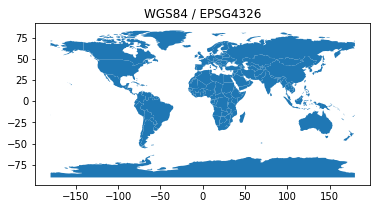

In [4]:
ax = world.plot()
ax.set_title('WGS84 / EPSG4326')
ax.plot()

[]

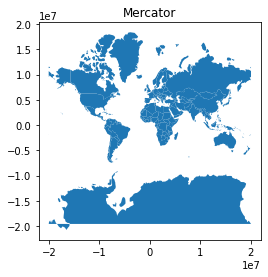

In [5]:
world2 = world.to_crs('epsg:3395') 
ax2 = world2.plot()
ax2.set_title("Mercator")
ax2.plot()

[]

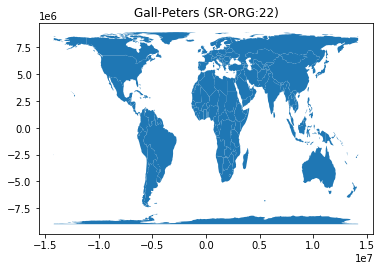

In [6]:
world3 = world.to_crs("+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
ax3 = world3.plot()
ax3.set_title("Gall-Peters (SR-ORG:22)")
ax3.plot()

[]

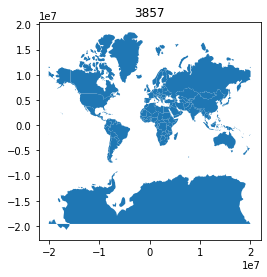

In [7]:
world4 = world.to_crs(epsg=3857) 
ax4 = world4.plot()
ax4.set_title("3857")
ax4.plot()

# Generating Geojson

In [8]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
print (cities.crs)
cities.head(2)


epsg:4326


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)


In [9]:
from geojson import Feature, FeatureCollection
from json import dumps

features = []
for index, row in cities.iterrows():
  features.append(Feature(id=index,
                          geometry=row.geometry,
                          properties={'City Name': row['name']}
                          ))
  
  cities_fc = FeatureCollection (features)
print(dumps(cities_fc[0:2], indent=2))

[
  {
    "type": "Feature",
    "id": 0,
    "geometry": {
      "type": "Point",
      "coordinates": [
        12.453387,
        41.903282
      ]
    },
    "properties": {
      "City Name": "Vatican City"
    }
  },
  {
    "type": "Feature",
    "id": 1,
    "geometry": {
      "type": "Point",
      "coordinates": [
        12.44177,
        43.936096
      ]
    },
    "properties": {
      "City Name": "San Marino"
    }
  }
]


In [10]:
features = []
for index, row in world.iterrows():
  features.append(Feature(id=index,
                          geometry=row.geometry,
                          properties={'Continent': row['continent'],
                                      'Country Name': row['name']	,
                                      'iso_a3': row['iso_a3'],
                                      'pop_est': row['pop_est'],
                                      'gdp_md_est': row['gdp_md_est']
                                      }
                          ))
  world_fc = FeatureCollection (features)
print(dumps(world_fc[1], indent=2))


{
  "type": "Feature",
  "id": 1,
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          33.903711,
          -0.95
        ],
        [
          34.07262,
          -1.05982
        ],
        [
          37.69869,
          -3.09699
        ],
        [
          37.7669,
          -3.67712
        ],
        [
          39.20222,
          -4.67677
        ],
        [
          38.74054,
          -5.90895
        ],
        [
          38.79977,
          -6.47566
        ],
        [
          39.44,
          -6.84
        ],
        [
          39.47,
          -7.1
        ],
        [
          39.19469,
          -7.7039
        ],
        [
          39.25203,
          -8.00781
        ],
        [
          39.18652,
          -8.48551
        ],
        [
          39.53574,
          -9.11237
        ],
        [
          39.9496,
          -10.0984
        ],
        [
          40.316586,
          -10.317098
        ],
        [
   